## Introduction

Initially, we will be looking at the identification of **named entities**, i.e. identifying references to entities in a text. This is also sometimes referred to as **entity extraction** or **named entity recognition**. A reference to a named entity in a text is referred to as an **entity mention**.

#### Named Entity Recognition

Named-entity recognition (NER) (also known as entity identification, entity chunking and entity extraction) is a subtask of information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc.

Most research on NER systems has been structured as taking an unannotated block of text, such as this one:

Jim bought 300 shares of Acme Corp. in 2006.

And producing an annotated block of text that highlights the names of entities:

[Jim]Person bought 300 shares of [Acme Corp.]Organization in [2006]Time.

In this example, a person name consisting of one token, a two-token company name and a temporal expression have been detected and classified.

State-of-the-art NER systems for English produce near-human performance. For example, the best system entering MUC-7 scored 93.39% of F-measure while human annotators scored 97.60% and 96.95%

#### Problem Statement

In the expression named entity, the word named restricts the task to those entities for which one or many strings, such as words or phrases, stands (fairly) consistently for some referent. This is closely related to rigid designators, as defined by Kripki, although in practice NER deals with many names and referents that are not philosophically "rigid". For instance, the automotive company created by Henry Ford in 1903 can be referred to as Ford or Ford Motor Company, although "Ford" can refer to many other entities as well. Rigid designators include proper names as well as terms for certain biological species and substances,[5] but exclude pronouns (such as "it"; see coreference resolution), descriptions that pick out a referent by its properties (see also De dicto and de re), and names for kinds of things as opposed to individuals (for example "Bank").

Full named-entity recognition is often broken down, conceptually and possibly also in implementations, as two distinct problems: detection of names, and classification of the names by the type of entity they refer to (e.g. person, organization, location and other). The first phase is typically simplified to a segmentation problem: names are defined to be contiguous spans of tokens, with no nesting, so that "Bank of America" is a single name, disregarding the fact that inside this name, the substring "America" is itself a name. This segmentation problem is formally similar to chunking. The second phase requires choosing an ontology by which to organize categories of things.

#### Evaluation

To evaluate the quality of a NER system's output, several measures have been defined. While accuracy on the token level is one possibility, it suffers from two problems: the vast majority of tokens in real-world text are not part of entity names as usually defined, so the baseline accuracy (always predict "not an entity") is extravagantly high, typically >90%; and mispredicting the full span of an entity name is not properly penalized (finding only a person's first name when their last name follows is scored as ½ accuracy).

In academic conferences such as CoNLL, a variant of the F1 score has been defined as follows:

Precision is the number of predicted entity name spans that line up exactly with spans in the gold standard evaluation data. I.e. when [Person Hans] [Person Blick] is predicted but [Person Hans Blick] was required, precision for the predicted name is zero. Precision is then averaged over all predicted entity names.
Recall is similarly the number of names in the gold standard that appear at exactly the same location in the predictions.
F1 score is the harmonic mean of these two.
It follows from the above definition that any prediction that misses a single token, includes a spurious token, or has the wrong class, is a hard error and does not contribute to either precision or recall.

Evaluation models based on a token-by-token matching have been proposed. Such models are able to handle also partially overlapping matches, yet fully rewarding only exact matches. They allow a finer grained evaluation and comparison of extraction systems, taking into account also the degree of mismatch in non-exact predictions.

Libraries to be imported to accomplish the task of identifying entities, predicting gender and portrayal of characters in a novel using SpaCy library.

In [2]:
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
#sys.path.append(r'/Users/davidw/Documents/teach/NLE/resources')
import os
os.chdir('C://Users//cmm//Desktop//NLP//resources')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
from itertools import zip_longest
from IPython.display import display
from random import seed
import random
import math
from pylab import rcParams
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import csv
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pylab as pylab
%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
get_ipython().magic('matplotlib inline')
import spacy
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
from nltk.corpus import gutenberg
nlp = spacy.load('en')
from GutenbergCorpus import GutenbergCorpusReader as gcr
reader = gcr.GutenbergCorpusReader()                         ## Sussex constructor

Sussex NLTK root directory is C:\Users\cmm\Desktop\NLP\resources


## Section 1

#### Code imports data from gutenberg corpus, Jane Austin's Emma is the novel used. The code parses the novel and 100 sample sentences are selected, these 100 sentences are going to be used for extracting entities from a sentence.

#### In information extraction, a named entity is a real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. It can be abstract or have a physical existence. Examples of named entities include Barack Obama,Manchester, Volkswagen Golf, or anything else that can be named. Named entities can simply be viewed as entity instances.

In [101]:
nlp = spacy.load('en')
emma = gutenberg.raw('austen-emma.txt')
parsed_emma = nlp(emma)
sense = gutenberg.raw('austen-sense.txt')
parsed_sense=nlp(sense)
moby = gutenberg.raw('melville-moby_dick.txt')
parsed_moby=nlp(moby)

In [4]:
import re
seed(181520)
sample_size = 100
my_sample = random.sample(list(parsed_emma.sents),sample_size) # select a random sample of sentences
sample=[]
for sent in my_sample:
    sent = re.sub("\s+"," ",sent.text) # clean up the whitespace
    print(sent,"\n")
    sample.append(sent)

A very serious sort, I assure you;" still smiling.  

"Who is that gentleman on horseback?" said she, as they proceeded-- speaking more to assist Mr. Weston in keeping his secret, than with any other view.  

I think I can give you a proof that it must be so.  

I hope she is right.--In one respect, my good fortune is undoubted, that of being able to subscribe myself, Your obliged and affectionate Son, F. C. WESTON CHURCHILL. CHAPTER XV  

"Something that would do!" repeated Mrs. Elton. "Aye, _that_ may suit your humble ideas of yourself;--I know what a modest creature you are; but it will not satisfy your friends to have you taking up with any thing that may offer, any inferior, commonplace situation, in a family not moving in a certain circle, or able to command the elegancies of life."  

She has been so kind as to promise it.  

"And if the Dixons should absolutely deny all knowledge of it we must conclude it to come from the Campbells."  

"Oh no! 

If she has it now, you have giv

#### Named entities can take the following form:

 {[u'CARDINAL', u'DATE', u'EVENT', u'FAC', u'GPE', u'LANGUAGE', u'LAW', u'LOC', u'MONEY', u'NORP', u'ORDINAL', u'ORG', u'PERCENT', u'PERSON', u'PRODUCT', u'QUANTITY', u'TIME', u'WORK_OF_ART'], u'0': [u''], u'3': [u'CARDINAL', u'DATE', u'EVENT', u'FAC', u'GPE', u'LANGUAGE', u'LAW', u'LOC', u'MONEY', u'NORP', u'ORDINAL', u'ORG', u'PERCENT', u'PERSON', u'PRODUCT', u'QUANTITY', u'TIME', u'WORK_OF_ART'], u'2': [u'CARDINAL', u'DATE', u'EVENT', u'FAC', u'GPE', u'LANGUAGE', u'LAW', u'LOC', u'MONEY', u'NORP', u'ORDINAL', u'ORG', u'PERCENT', u'PERSON', u'PRODUCT', u'QUANTITY', u'TIME', u'WORK_OF_ART'], u'5': [u''], u'4': [u'CARDINAL', u'DATE', u'EVENT', u'FAC', u'GPE', u'LANGUAGE', u'LAW', u'LOC', u'MONEY', u'NORP', u'ORDINAL', u'ORG', u'PERCENT', u'PERSON', u'PRODUCT', u'QUANTITY', u'TIME', u'WORK_OF_ART']}

#### 100 sentences are iterated over and the entities are extracted from each sentence with tagged entities. Now these are classified according to entity type and misclassified examples are aggregated manually. A Dataframe is output containing Entities and their types in sample set of sentences. Upon running the code it was found that person class has maximum entries as expected because of characters in a novel. Also mentions of 8 other entity types are recorded.

In [5]:
entities=[]
type_entity=[]
sentences=[]
for sent in sample:
    parsed_sentence=nlp(sent)
    for ent in parsed_sentence.ents:
        if ent.text not in entities:
            entities.append(ent.text)
            sentences.append(sent)
            type_entity.append(ent.label_)
Entities=pd.DataFrame({'Sentence':sentences,'Entity':entities,'Entity_type':type_entity})
len(Entities)
Entities

,Entity,Entity_type,Sentence
0,Weston,PERSON,"""Who is that gentleman on horseback?"" said she..."
1,Son,PERSON,"I hope she is right.--In one respect, my good ..."
2,F. C. WESTON CHURCHILL.,PERSON,"I hope she is right.--In one respect, my good ..."
3,Elton,PERSON,"""Something that would do!"" repeated Mrs. Elton..."
4,Dixons,ORG,"""And if the Dixons should absolutely deny all ..."
5,Emma,PERSON,[Emma by Jane Austen 1816] VOLUME I CHAPTER
6,Jane Austen,PERSON,[Emma by Jane Austen 1816] VOLUME I CHAPTER
7,1816,DATE,[Emma by Jane Austen 1816] VOLUME I CHAPTER
8,William,PERSON,"William did not seem to mind it himself, he wa..."
9,Hodges,PERSON,"William did not seem to mind it himself, he wa..."


#### A visualisation depicting the number of entities per class

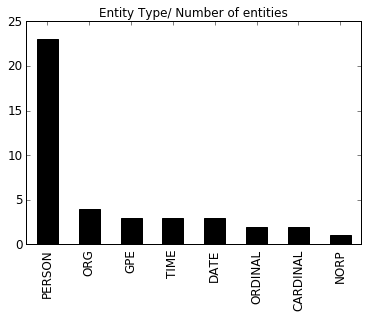

In [6]:
ax = plt.subplot(111)
Entities.Entity_type.value_counts().plot(kind='bar',title='Entity Type/ Number of entities',color='k')

#### The confusion matrix that is showing truly classified examples and false classifications. Most classifications for different classes are with decent accuracy, the rest are so small in sample, including them to judge spacy's NER capabilities won't hold any significance.

                                                  True Label

| `PERSON` | `NORP` | `FACILITY` | `ORG` | `GPE` | `LOC` | `PRODUCT` | `EVENT` | `WORK_OF_ART` | `LAW` | `DATE` | `PERCENT` | `TIME` | `MONEY` | `QUANTITY` | `ORDINAL` | `CARDINAL` | 
:----: |---
`PERSON` |22 | | | 3| | | | | |1 | | | | | | |
`NORP` | | | | | | | | | | | | | | | | |
`FACILITY` | | | | |1 | | | | | | | | | | | |
`ORG` | | | |2 | | | | | | | | | | | | |
`GPE` |1 | | | | 1| | | | | | | | | | | |
`LOC` | | | | | | | | | | | | | | | | |
`PRODUCT` | | | | | | | | | | | | | | | | |
`EVENT` | | | | | | | | | | | | | | | | |
`WORK_OF_ART` | | | | | | | | | | | | | | | | |
`LAW` | | | | | | | | | | | | | | | | |
`LANGUAGE` | | | | | | | | | | | | | | | | |
`DATE` | | | | | | | | | |4 | | | | | | |
`TIME` | | | | | | | | | | | | 6| | | | |
`PERCENT` | | | | | | | | | | | | | | | | |
`MONEY` | | | | | | | | | | | | | | | | |
`QUANTITY` | | | | | | | | | | | | | | | | |
`ORDINAL` | | | | | | | | | | | | | | |1 | |
`CARDINAL` | | | | | | | | | | | | | | | |3 |

## Section 2

In this section will be looking at how to determine, for a given author or authors, whether there are differences in portrail of characters based on gender. 

Our final task in this notebook is to define a function that guesses the gender of a character based on his or her name.  

We have provided a csv file called `names.csv` that contains several thousand male and female names with information about how frequent each name is. 

#### Recognizing the gender of the identified PERSON  class entity

Create_gender_map() function as shown in Topic 7, extracts the male and female names by comparing occurence of a name and comparing between the polarity of its occurence in the specific gender. Input file to the function is the provided file 'names.csv'.

A Gender Guesser function is created which inputs a string and gender_map to return whether the string name is male female or unknown. The code is a rule based architecture, where the function checks whether a single word word is passed and compares with gender map to get entity gender labels.

If the length of the name entered is greater than 1, the underlying condition checks whether the name is with a surname, extracts the first name and again checks from gender map for the name. Titles have been been defined for male and female class which can signify gender such as Lady or mr. are extracted from a predefined list to extract names with titles.


### Novel Used: Alice in the wonderland

In [7]:
## Function to create gender map from names.csv file
def create_gender_map(dict_reader):
    names_info = defaultdict(lambda: {"gender":"", "freq": 0.0})
    for row in input_file:
        name = row["name"].lower()
        if names_info[name]["freq"] < float(row["freq"]): # is this gender more frequent?
            names_info[name]["gender"] = row["gender"] 
            names_info[name]["freq"] = float(row["freq"])
    gender_map = defaultdict(lambda: "unknown")
    for name in names_info:
        gender_map[name] = names_info[name]["gender"]
    return gender_map
os.chdir('C://Users//cmm//Desktop')

input_file = csv.DictReader(open('names.csv')) ## Importing our names.csv file
gender_map = create_gender_map(input_file)    ## Import the gender map
#### Male homonyms
male_title=['mr.','sir','monsieur','captain','chief','master','lord','baron','mister','mr','prince','king']
#### Female homonyms
female_title=['mrs.','ms.','miss','lady','madameoiselle','baroness','mistress','mrs','ms','queen','princess','madam','madame']


def gender_guess(name,gender_map):                   #Identifying entries in the names.csv database#
    if (len(name.split()))==1:
        if name.lower() in gender_map.keys():
            return gender_map[name]
        else:
            return('unknown')
    
    if(len(name.split()))>1:                        
        name_array=name.lower().split()
        if name_array[0] in gender_map.keys():
            return gender_map[name_array[0]]
        
        
        for title in name_array:                     #Recognising titles of entries# 
            if title in male_title:
                return 'male'
            elif title in female_title:
                return 'female'
            else: 
                return('unknown')
                break
        
def named_entity_counts(document,named_entity_label):    
    
## Function that outputs a Counter object of human entities found

    occurrences = [ent.string.strip() for ent in document.ents 
                   if ent.label_ == named_entity_label and ent.string.strip()]
    return Counter(occurrences)

alice = gutenberg.raw(fileids='carroll-alice.txt')
parsed_alice=nlp(alice)
text = parsed_alice    ### Parsing Alice in the wonderland by Lewis Carroll
entity_type = 'PERSON' ## Type of entry
number_of_entities = 10  ### Control over obtaining number of defined type entities
Entities=pd.DataFrame(named_entity_counts(text,entity_type).most_common(number_of_entities),columns=["Entity","Count"])
entity=[]
for char in Entities['Entity']:
    entity.append(gender_guess(char.lower(),gender_map))
Entities['Pred_Gender']=entity

In [8]:
Entities

,Entity,Count,Pred_Gender
0,Alice,388,female
1,Gryphon,32,unknown
2,Queen,27,female
3,Mouse,25,unknown
4,Rabbit,20,unknown
5,Bill,12,male
6,Dormouse,8,unknown
7,Dinah,8,female
8,William,5,male
9,Beau,4,male


### Evaluating the Gender classifier for different entities

#### Male type Entities

In [9]:
names=['harry','abdul','homer','gary','robert','wayne','lionel']
for name in names:
    print(gender_guess(name,gender_map))

male
male
male
male
male
male
male


#### Female type entities

In [10]:
names=['martha','holly','nicole','catherine','ruth','april','christina']
for name in names:
    print(gender_guess(name,gender_map))

female
female
female
female
female
female
female


#### For first and last names given

In [11]:
names=['Liz Lemon','Leslie Knope','jesus navas','Robert Lewandowski','Anthony Martial','Wesley Sneijder']
for name in names:
    print(gender_guess(name,gender_map))

female
female
male
male
male
male


#### For names with titles

In [12]:
print(gender_guess('Sir Alex Ferguson',gender_map))
print(gender_guess('Lady McElroy',gender_map))
print(gender_guess('Captain Subash Chandra boBe',gender_map))

male
female
male


#### The program returns 'unknown' if the gender of the entity can't be determined by the function created. This error is a result of the name not being in the names.csv folder or doesn't have a gender bisecting title attached to it

In [13]:
print(gender_guess('Liam Neeson',gender_map))
print(gender_guess('Mahatma Gandhi',gender_map))
print(gender_guess('Pricella McCartney',gender_map))

unknown
unknown
unknown


## Section 3

We will look at how it is possible to capture apspects of the way in which characters are portrayed, in terms of features. Each character in a novel will be represented in terms of a feature set. For example, one option is that the features are the verbs that the character is the object of (giving a rough sense of what the character does).

For each character, we will collect a set of features and represent the feature set associated with a character as a special kind of dictionary called a `Counter`. Each feature is used as a key and the counter maps that feature to a weight which could, for example, be a count indicating how many times that feature has been seen.

### Gutenberg electronic text archive
[Project Gutenberg electronic text archive](http://www.gutenberg.org/) contains around 75,000 free electronic books. We have made 14862 of the text available to you. 


To access these texts run the following cell.

If you are working on your own machine you will need to do the following:
- download and unzip the file `\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources.zip'`
- update the directory in the following cell, changing the string
`'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources/data/gutenberg_eng'` to be the location of the directory within the resources folder that contains "authors.p" and "cleaned_meta_gutenberg"

There are 784 authors whose work have been mentioned in the gutenberg corpus

In [14]:
from GutenbergCorpus import GutenbergCorpusReader as gcr
reader = gcr.GutenbergCorpusReader('C://Users//cmm//Desktop//NLP//resources//data//gutenberg_eng') 
authors = reader.get_authors()

In [15]:
print('The number of authors mentioned in the Gutenberg corpus are:',format(len(authors)))
for author in authors:
    print("{0}: {1}".format(author,len(authors[author])))

The number of authors mentioned in the Gutenberg corpus are: 784
Miller, Alice Duer: 7
Sayce, A. H. (Archibald Henry): 8
Barbour, Ralph Henry: 19
Casanova, Giacomo: 39
Locke, William John: 11
Lowndes, Marie Belloc: 14
Nietzsche, Friedrich Wilhelm: 11
Hergesheimer, Joseph: 11
Pierson, Clara Dillingham: 7
Rockwood, Roy: 10
Shelley, Mary Wollstonecraft: 7
Farnol, Jeffery: 14
Richards, Laura Elizabeth Howe: 35
Curwood, James Oliver: 24
Maugham, W. Somerset (William Somerset): 14
Boothby, Guy: 16
Frey, Hildegard G.: 10
Duellman, William Edward: 14
Stretton, Hesba: 7
Gibbon, Edward: 17
Porter, Eleanor H. (Eleanor Hodgman): 14
Goldfrap, John Henry: 25
Anstey, F.: 18
Pater, Walter: 10
Cooper, James Fenimore: 36
Symonds, John Addington: 17
Roberts, B. H. (Brigham Henry): 12
Burroughs, Edgar Rice: 27
Buchan, John: 12
Loti, Pierre: 13
Becke, Louis: 40
Maclaren, Alexander: 20
Eastman, Charles Alexander: 8
Sudermann, Hermann: 16
Butler, Ellis Parker: 22
Steele, Richard, Sir: 10
Black, William: 19
P

#### Initialising our problem with parsing the novel by James De Mille for analyzing feature sets of characters. The name of the selected novel is The Cryptogram

In [20]:
os.chdir('C://Users//cmm//Desktop//NLP//resources')
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
from GutenbergCorpus import GutenbergCorpusReader as gcr
reader = gcr.GutenbergCorpusReader()
reader = gcr.GutenbergCorpusReader("C://Users//cmm//Desktop//NLP//resources//data//gutenberg_eng") 

authors = reader.get_authors()
tot = 0
for author in authors:
    tot += len(authors[author])

works = reader.get_authors_works('De Mille, James')
for work in works:
    print(work["title"])
parsed_novel = nlp(works[7]["text"])

Among the Brigands
Cord and Creese
A Castle in Spain: A Novel
Lost in the Fog
The Lady of the Ice: A Novel
The Cryptogram: A Novel
A Strange Manuscript Found in a Copper Cylinder
The American Baron: A Novel
The Lily and the Cross: A Tale of Acadia
The Living Link: A Novel
The Martyr of the Catacombs
A Tale of Ancient Rome
The Dodge Club; Or, Italy in MDCCCLIX


#### The code returns the feature sets for characters extracted from the novel. The code has added functionality to remove most common occuring verbs in the novel. Also, addition of relations 'nsubj' and 'dobj' are added.


#### Defining our helper functions:
- get_entities_in(parsed_novel,entity_type): inputs parsed novel and entity type to be extracted, returns an array with extracted user defined type entity names

- get_main_characters(parsed_novel,num_characters)
- get_main_characters(parsed_novel,num_characters):
- get_interesting_contexts(novels,rels,num_characters,verb_stop)
- get_pos_in(parsed_novel,pos_type,remove_pos_numb): Extracts all common verbs from the novel and returns a list of all common verbs

remove_pos_numb is the argument that filters common verbs. The number signifies the first n numbers to be removed from the most common verbs. Interseting contexts and characteristics the user has are to be determined by removing most common verbs.

The main function 'get interesting contexts' runs on the parsed novel, entities that are in main characters identified by get_main_characters are identified. Verbs and relations associated with these entities are extracted. 
Stop verbs are removed and a Counter of verbs is returned as output.

In [23]:
def get_entities_in(parsed_novel,entity_type): ## Get_entities_in returns entity in a novel given the type of entity 
    
    return [ent.text.strip().lower() for ent in parsed_novel.ents 
            if ent.label_ == entity_type and ent.text.strip()]

def get_pos_in(parsed_novel,pos_type,remove_pos_numb):   
    
## Get's the list of desired pos tag in passed tag and filters top n common entries

    verbs = [token.text for token in parsed_novel if  token.pos_ == pos_type]
    verbs = [verb.lower() for verb in verbs]
    common_verbs=[]
    for row in Counter(verbs).most_common()[:remove_pos_numb]:
        common_verbs.append(row[0])
    return common_verbs
        
def get_main_characters(parsed_novel,num_characters): 
    
    # Function returns the most commonly occuring characters in a parsed novel
    
    C=(Counter(get_entities_in(parsed_novel,"PERSON")).most_common()[0:num_characters])
    main_characters=[]
    for row in C:
        main_characters.append(row[0])
    return Counter(main_characters)

def get_interesting_contexts(novels,rels,num_characters,verb_stop):
    
    def of_interest(ent,rels,main_characters):
        return (ent.text.strip().lower() in main_characters 
                and ent.label_ == 'PERSON' 
                and ent.root.head.pos_ == 'VERB'
                and ent.root.dep_ in rels)  

    contexts = defaultdict(Counter)    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        stop_verbs=get_pos_in(parsed_novel,'VERB',verb_stop)
        for ent in parsed_novel.ents:
            if of_interest(ent,rels,main_characters):
                if ent.root.head.lemma_ not in stop_verbs:
                    contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
    return contexts
                

novels = {parsed_novel}  ## Parsed novel
number_of_characters_per_text = 8 ## Threshold for the number of characters you want contexts for
target_rels = {'nsubj'} # Relation: Can treat entity as a subject. For object relations enter 'dobj'
target_contexts = get_interesting_contexts(novels,target_rels,number_of_characters_per_text,1500)
display(pd.DataFrame.from_dict(target_contexts).applymap(lambda x: '' if math.isnan(x) else x)) #Display result df
# C=(Counter(get_entities_in(parsed_novel,"VERB")).most_common())
# get_pos_in(parsed_novel,'VERB',60)

,baron,dacres,ethel,girasole,kitty,lady dalrymple,minnie,willoughby
add,,,1,,,,,
bend,,,3,,,,,
bewilder,1,,,,,,,
bow,,,,,,2,,
brush,2,,,,,,,
clasp,,,,,,,,1
clinch,1,,,,,,,
confide,1,,,,,,,
confront,,,,,,,1,
continue,1,3,,,,,1,2


- This returns a dataframe with 73 action verbs that a character has performed in the novel.

- By going through the list words it is easy to find the actions and notions a character is portrayed in.

- The general tone of the novel with words appearing such as steal, stammer , sob, cry, kiss, bow, clasp etc.

- Words appearing in the novel for certain characters may suggest the character traits identyfying the light in which the characters are portrayed

#### Since we are interested in quantifying the extent to which authors exhibit gender-based distinctions in the way they in the way that they portray their main characters, it would be useful to base this not only on the contexts of places where a character is mentioned by name, but also when a character is mentioned with a pronoun. The pronouns "he", "she", "his" and "her" indicate the gender of the person being referred to, so provide a reliable source of additional data.

#### The following code cell shows how these pronouns can be extracted from a text using the `noun_chunks` property of a parsed document. Noun chunks are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, "the lavish green grass" or "the world’s largest tech fund". 


#### Extracting features from pronouns in the parsed_novel, there were 95 of these features found, after removing commonly occuring verbs. The function gendered_pronoun takes in an argument as the noun phrase and returns the noun phrases that have pronouns ;he, she, is and her'. These pronoun phrases are then used to extract the associative word attached to the pronoun. Common verbs occuring in the text are removed by the use of the previously created get_pos_in function. 

In [25]:
def gendered_pronoun(np):
    return np.text.strip() in ["he", "she", "her", "his"]
stop_verbs=get_pos_in(parsed_novel,'VERB',1400)
text = parsed_novel
nounphrases = [[re.sub("\s+"," ",np.text), np.root.head.text] for np in parsed_novel.noun_chunks if gendered_pronoun(np) and np.root.head.text not in stop_verbs]
print("There were {} noun phrases found.".format(len(nounphrases)))
df=(pd.DataFrame(nounphrases,columns=['Pronoun','Verb']))
df

There were 327 noun phrases found.


,Pronoun,Verb
0,her,unlike
1,her,about
2,she,pouted
3,he,whipped
4,her,after
5,her,to
6,she,not
7,he,signaled
8,her,restore
9,her,upon


## Section 4

### Aggregating feature sets

Once you are satisifed with the feature sets that you are able to build for a character, you are ready to undertake your analysis of the way characters are being portrayed based on gender.

- Select a set of novels
- Parse each of the novels with spaCy (this might take a while)
- Determine the settings of any parameters that are needed by the code you have written to produce the character feature sets, e.g.
 - the number characters to consider in each novel
 - the number of most common verbs to disregard
- Run your code that builds feature sets for characters over all of the novels under consideration
- Build two aggregated feature sets, one for all female characters and one for all male characters

In the next cell, we look at how to measure the difference between these two aggregated feature sets and how to assess whether the different you find is significant.

### Measuring the similarity of two feature sets

The code cell below shows how to compare the similarity of two feature sets. This is now explained.

- We are given two feature sets: `A` and `B`.
- Initially, each feature set is represented as a `Counter` which is a dictionary where the keys are the features and each feature (key) is mapped to a positive number which corresponds to the strength (weight) of that feature. 
 - feature set `A` has features `'a', 'b' and 'c'` with weights `1, 2 and 3`, respectively.
 - feature set `B` has features `'b', 'c', 'd' and 'e'` with weights `3, 4, 5 and 6`, respectively.
- Note that they share some, but not all of their features.
- Our goal is to represent both feature sets as lists in such a way that each position in a lists is consistently used for a particular feature
- For example, we could use a list with 5 positions, where the weight of feature `'a'` is held in the first position, the weight of feature `'b'` is held in the second position, and so on. 
 - with this scheme the feature list for `A` would be the list: `[1,2,3,0,0]`, and the feature list for `B` would be `[0,3,4,5,6]`.
- The function `counters_to_feature_lists` takes two feature sets each of which is a `Counter` and returns two lists, one for each of the inputs, where both lists use the same feature representation.
- In the first line of the function, the counters are added together. This is done because the keys of resulting counter (which is named `combined`) can be used to produce consistent mappings of the counters to lists - see lines 2 and 3.
- Once consistent list representations are produced for the two feature sets, we can use the `cosine_similarity` function from `sklearn` as as a measure of how similar the lists are, and therefore, how similar the feature sets are.
- `cosine_similarity` returns a real number between 0 and 1, with 1 indicating that the inputs are identical, and 0 indicating that the two inputs are completely different.


#### Collection of novels from two different authors:
- **The Cromptons** by Mary J. Holmes
- **The Red Room** by H.G Wells

In [82]:
works = reader.get_authors_works('Holmes, Mary Jane')
parsed_novel1 = nlp(works[2]["text"])
works = reader.get_authors_works('Wells, H. G. (Herbert George)')
parsed_novel2 = nlp(works[10]["text"])

#### Fetch feature sets of the 2 novels parsed of all the male characters

In [83]:
def get_interesting_contexts_gender(novels,rels,num_characters,verb_stop,gender):
    def of_interest(ent,rels,main_characters,gender):
        if gender_guess(ent.text.strip().lower(),gender_map)==gender:
            return (ent.text.strip().lower() in main_characters 
                    and ent.label_ == 'PERSON' 
                    and ent.root.head.pos_ == 'VERB'
                    and ent.root.dep_ in rels)  

    contexts = defaultdict(Counter)    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        stop_verbs=get_pos_in(parsed_novel,'VERB',verb_stop)
        for ent in parsed_novel.ents:
            if of_interest(ent,rels,main_characters,gender):
                if ent.root.head.lemma_ not in stop_verbs:
                    contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
    return contexts
novels = {parsed_novel1,parsed_novel2}
number_of_characters_per_text = 8
target_rels = {'nsubj','dobj'}
verb_stop=1000
target_contexts = get_interesting_contexts_gender(novels,target_rels,number_of_characters_per_text,verb_stop,'male')
display(pd.DataFrame.from_dict(target_contexts).applymap(lambda x: '' if math.isnan(x) else x))
# C=(Counter(get_entities_in(parsed_novel,"VERB")).most_common())
# get_pos_in(parsed_novel,'VERB',60)

,angel,howard,jack,jake,peter
act,1,,1,,
add,,1,,,
appear,2,,,,
approach,1,,,,
argue,,1,,,
bow,1,1,,,
breathe,1,,,,
cease,1,,,,
clench,,,,1,
cling,,,,,1


#### Fetch feature sets of the 2 novels parsed of all the female characters.

In [85]:
def get_interesting_contexts_gender(novels,rels,num_characters,verb_stop,gender):
    def of_interest(ent,rels,main_characters,gender):
        if gender_guess(ent.text.strip().lower(),gender_map)==gender:
            return (ent.text.strip().lower() in main_characters 
                    and ent.label_ == 'PERSON' 
                    and ent.root.head.pos_ == 'VERB'
                    and ent.root.dep_ in rels)  

    contexts = defaultdict(Counter)    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        stop_verbs=get_pos_in(parsed_novel,'VERB',verb_stop)
        for ent in parsed_novel.ents:
            if of_interest(ent,rels,main_characters,gender):
                if ent.root.head.lemma_ not in stop_verbs:
                    contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
    return contexts
novels = { parsed_novel1,parsed_novel2}
number_of_characters_per_text = 7
target_rels = {'nsubj','dobj'}
verb_stop=1000
target_contexts = get_interesting_contexts_gender(novels,target_rels,number_of_characters_per_text,verb_stop,'female')
display(pd.DataFrame.from_dict(target_contexts).applymap(lambda x: '' if math.isnan(x) else x))
# C=(Counter(get_entities_in(parsed_novel,"VERB")).most_common())
# get_pos_in(parsed_novel,'VERB',60)

,amy,eloise,lady hammergallow,mandy ann,mrs jehoram,mrs mendham
',,,,1,,
add,,,,,,1
arrange,,1,,,,
assent,1,,,,,
boast,,,,1,,
borrow,,,,1,,
chat,,1,,,,
chime,,,,1,,
choke,,,,1,,
continue,,1,,1,,


### Cosine similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any other angle. It is thus a judgment of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude. Cosine similarity is particularly used in positive space, where the outcome is neatly bounded in [0,1]. The name derives from the term "direction cosine": in this case, note that unit vectors are maximally "similar" if they're parallel and maximally "dissimilar" if they're orthogonal (perpendicular). This is analogous to the cosine, which is unity (maximum value) when the segments subtend a zero angle and zero (uncorrelated) when the segments are perpendicular.

In practice, cosine similarity tends to be useful when trying to determine how similar two texts/documents are. I’ve seen it used for sentiment analysis, translation, and some rather brilliant work at Georgia Tech for detecting plagiarism. Cosine similarity works in these usecases because we ignore magnitude and focus solely on orientation. In NLP, this might help us still detect that a much longer document has the same “theme” as a much shorter document since we don’t worry about the magnitude or the “length” of the documents themselves.

Intuitively, let’s say we have 2 vectors, each representing a sentence. If the vectors are close to parallel, maybe we assume that both sentences are “similar” in theme. Whereas if the vectors are orthogonal, then we assume the sentences are independent or NOT “similar”. Depending on your usecase, maybe you want to find very similar documents or very different documents, so you compute the cosine similarity.

The business use case for cosine similarity involves comparing customer profiles, product profiles or text documents. The algorithmic question is whether two customer profiles are similar or not. Cosine similarity is perhaps the simplest way to determine this.

If one can compare whether any two objects are similar, one can use the similarity as a building block to achieve more complex tasks, such as:

- search: find the most similar document to a given one
- classification: is some customer likely to buy that product
- clustering: are there natural groups of similar documents
- product recommendations: which products are similar to the customer’s past purchases


The term "cosine similarity" is sometimes used to refer to a different definition of similarity provided below. However the most common use of "cosine similarity" is as defined above and the similarity and distance metrics defined below are referred to as "angular similarity" and "angular distance" respectively. The normalized angle between the vectors is a formal distance metric and can be calculated from the similarity score defined above. This angular distance metric can then be used to compute a similarity function bounded between 0 and 1, inclusive.

The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality (decorrelation), and in-between values indicating intermediate similarity or dissimilarity.

For text matching, the attribute vectors A and B are usually the term frequency vectors of the documents. The cosine similarity can be seen as a method of normalizing document length during comparison.

In the case of information retrieval, the cosine similarity of two documents will range from 0 to 1, since the term frequencies (tf-idf weights) cannot be negative. The angle between two term frequency vectors cannot be greater than 90°.

If the attribute vectors are normalized by subtracting the vector means, the measure is called centered cosine similarity and is equivalent to the Pearson correlation coefficient.

### Example of measuring cosine similarity

Here are two very short texts to compare:

Julie loves me more than Linda loves me

Jane likes me more than Julie loves me

We want to know how similar these texts are, purely in terms of word counts (and ignoring word order). We begin by making a list of the words from both texts:

me Julie loves Linda than more likes Jane

Now we count the number of times each of these words appears in each text:

   me   2   2
 Jane   0   1
Julie   1   1
Linda   1   0
likes   0   1
loves   2   1
 more   1   1
 than   1   1
We are not interested in the words themselves though. We are interested only in those two vertical vectors of counts. For instance, there are two instances of 'me' in each text. We are going to decide how close these two texts are to each other by calculating one function of those two vectors, namely the cosine of the angle between them.

The two vectors are, again:

a: [2, 1, 0, 2, 0, 1, 1, 1]

b: [2, 1, 1, 1, 1, 0, 1, 1]
The cosine of the angle between them is about 0.822.

These vectors are 8-dimensional. A virtue of using cosine similarity is clearly that it converts a question that is beyond human ability to visualise to one that can be. In this case you can think of this as the angle of about 35 degrees which is some 'distance' from zero or perfect agreement.

#### Measuring cosine similarity in two sets of genders to encapsulate differences in feature portrayal

The interesting contexts function is modeified to return the counter object of verbs associated with their frequencies.
The function in Topic 8 is used to calculate the cosine similarity between the 2 counter objects.

In [86]:
from sklearn.metrics.pairwise import cosine_similarity

def get_interesting_contexts_gender(novels,rels,num_characters,verb_stop,gender):
    def of_interest(ent,rels,main_characters,gender):
        if gender_guess(ent.text.strip().lower(),gender_map)==gender:
            return (ent.text.strip().lower() in main_characters 
                    and ent.label_ == 'PERSON' 
                    and ent.root.head.pos_ == 'VERB'
                    and ent.root.dep_ in rels)  

    contexts = defaultdict(Counter)    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        stop_verbs=get_pos_in(parsed_novel,'VERB',verb_stop)
        for ent in parsed_novel.ents:
            if of_interest(ent,rels,main_characters,gender):
                if ent.root.head.lemma_ not in stop_verbs:
                    contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
    df=(pd.DataFrame.from_dict(contexts).applymap(lambda x: 0 if math.isnan(x) else x))
    return Counter(dict(df.sum(axis=1)))

A = get_interesting_contexts_gender(novels,target_rels,number_of_characters_per_text,verb_stop,'male')
B = get_interesting_contexts_gender(novels,target_rels,number_of_characters_per_text,verb_stop,'female')

def counters_to_feature_lists(counter1,counter2):
    combined = counter1 + counter2 
    list1 = [counter1[key] for key in combined]
    list2 = [counter2[key] for key in combined]
    return list1,list2
Counter(A)
L1,L2 = counters_to_feature_lists(A,B)
# print(L1)
# print(L2)
cosine_similarity([L1], [L2])[0,0]

0.32136453035056578

#### The cosine similarity comes out to be 0.32 which is less than 1, signifying a significant difference in the feature sets of the male and female class.

In [95]:
def get_interesting_contexts(novels,rels,num_characters,verb_stop):
    def of_interest(ent,rels,main_characters):
        return (ent.text.strip().lower() in main_characters 
                and ent.label_ == 'PERSON' 
                and ent.root.head.pos_ == 'VERB'
                and ent.root.dep_ in rels)  

    contexts = defaultdict(Counter)    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        stop_verbs=get_pos_in(parsed_novel,'VERB',verb_stop)
        for ent in parsed_novel.ents:
            if of_interest(ent,rels,main_characters):
                if ent.root.head.lemma_ not in stop_verbs:
                    contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
    df=(pd.DataFrame.from_dict(contexts).applymap(lambda x: 0 if math.isnan(x) else x))
    A=df.iloc[:,:5]
    A_=Counter(dict(A.sum(axis=1)))
#     B=df.iloc[:,5:]
#     A_=Counter(dict(B.sum(axis=1)))
    return A_
    
novels = {parsed_novel1,parsed_novel2}
number_of_characters_per_text=8
target_rels = {'nsubj','dobj'}  
A_count = get_interesting_contexts(novels,target_rels,number_of_characters_per_text,100)


def get_interesting_contexts(novels,rels,num_characters,verb_stop):
    def of_interest(ent,rels,main_characters):
        return (ent.text.strip().lower() in main_characters 
                and ent.label_ == 'PERSON' 
                and ent.root.head.pos_ == 'VERB'
                and ent.root.dep_ in rels)  

    contexts = defaultdict(Counter)    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        stop_verbs=get_pos_in(parsed_novel,'VERB',verb_stop)
        for ent in parsed_novel.ents:
            if of_interest(ent,rels,main_characters):
                if ent.root.head.lemma_ not in stop_verbs:
                    contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
    df=(pd.DataFrame.from_dict(contexts).applymap(lambda x: 0 if math.isnan(x) else x))
    B=df.iloc[:,5:]
    B_=Counter(dict(B.sum(axis=1)))
#     B=df.iloc[:,5:]
#     A_=Counter(dict(B.sum(axis=1)))
    return B_

B_count = get_interesting_contexts(novels,target_rels,number_of_characters_per_text,100)


def counters_to_feature_lists(counter1,counter2):
    combined = counter1 + counter2 
    list1 = [counter1[key] for key in combined]
    list2 = [counter2[key] for key in combined]
    return list1,list2

L1,L2 = counters_to_feature_lists(A_count,B_count)
# print(L1)
# print(L2)
a=cosine_similarity([L1], [L2])[0,0]
print(a)

0.805911695214


In the case where 8 characters are selected from the 2 novels, and split is made on basis of first 4 and last 4 entries, there is a mix of male and female entities in both the sample sets. The cosine similarity turns out to be 0.8, which is approximately close to 1. The verb stopping criteria was set to filter out top 200 common verbs.

In the dataset we have used, the genders are balanced approximately, with 5 male and 6 female characters that are used to assess gender wise differences in the characters obtained, so it can be said the low value for cosine similarity obtained can't be attributed to gender imbalance.

The effects of a gender imbalance would definitely bias the cosine similarity values as the corpus for majority class has more root lemmas in total, and the frequency of each term is also enhanced.